### Introduction to visualization

The usual imports and we want to use `PathTreeBuilder` and `MoveTreeBuilder`.

In [1]:
%matplotlib inline
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder, PathTreeBuilder
from IPython.display import SVG, HTML

Let's load some data from our usual suspects the toy simulation.

In [2]:
st = paths.Storage('mstis.nc', mode='r')

Retrieve the move scheme and one of the transitions:

In [3]:
scheme = st.schemes[0]
transition = scheme.network.sampling_transitions[0]

In [4]:
print transition

TISTransition: Out B
B -> B or all states except B
Interface: 0.0<opB<0.04
Interface: 0.0<opB<0.09
Interface: 0.0<opB<0.16



Now build a PathTreeBuilder using the storage with some settings and showing some states.
Blue is `stateA` and should be the first and last frame only unless the trajectory crosses to `stateB`
The Interfaces are indicated by shades of red. 

Finally the number in the snapshot references the stored index of associated configuration holding the coordinates.

In [5]:
tree = PathTreeBuilder(st)
tree.rejected = True
tree.states = [ ('blue', transition.stateA) ]

for no, interface in enumerate(transition.interfaces[0:]):
    tree.states.append(('rgb(' + str(no*30) + ',0,0)', interface))

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = lambda snap : snap.configuration.idx[st]
heritage = tree.construct_heritage(st.samples[50])
tree.from_samples(heritage)

AttributeError: 'ToySnapshot' object has no attribute 'configuration'

In [6]:
view = tree.renderer
view.zoom = 1.1
view.scale_y = 20
view.scale_x = 16
view.font_size = 0.24
SVG(view.to_svg())

Next is the movetreebuilder

In [7]:
movevis = paths.visualize.MoveTreeBuilder(st)

This shows the full movepath of all steps (right now this disables and only shows the first step!)

In [8]:
movevis.full(transition.ensembles)

AttributeError: 'NoneType' object has no attribute 'depth_post_order'

In [9]:
view = movevis.renderer
view.zoom = 1.5
SVG(view.to_svg())

Next display a Mover (the structure of possible moves, not the concrete realization during a simulation!)

and display it and show which of the RETIS ensembles are used in which mover

In [10]:
all_ensembles = [transition.minus_ensemble._segment_ensemble, transition.minus_ensemble] + transition.ensembles

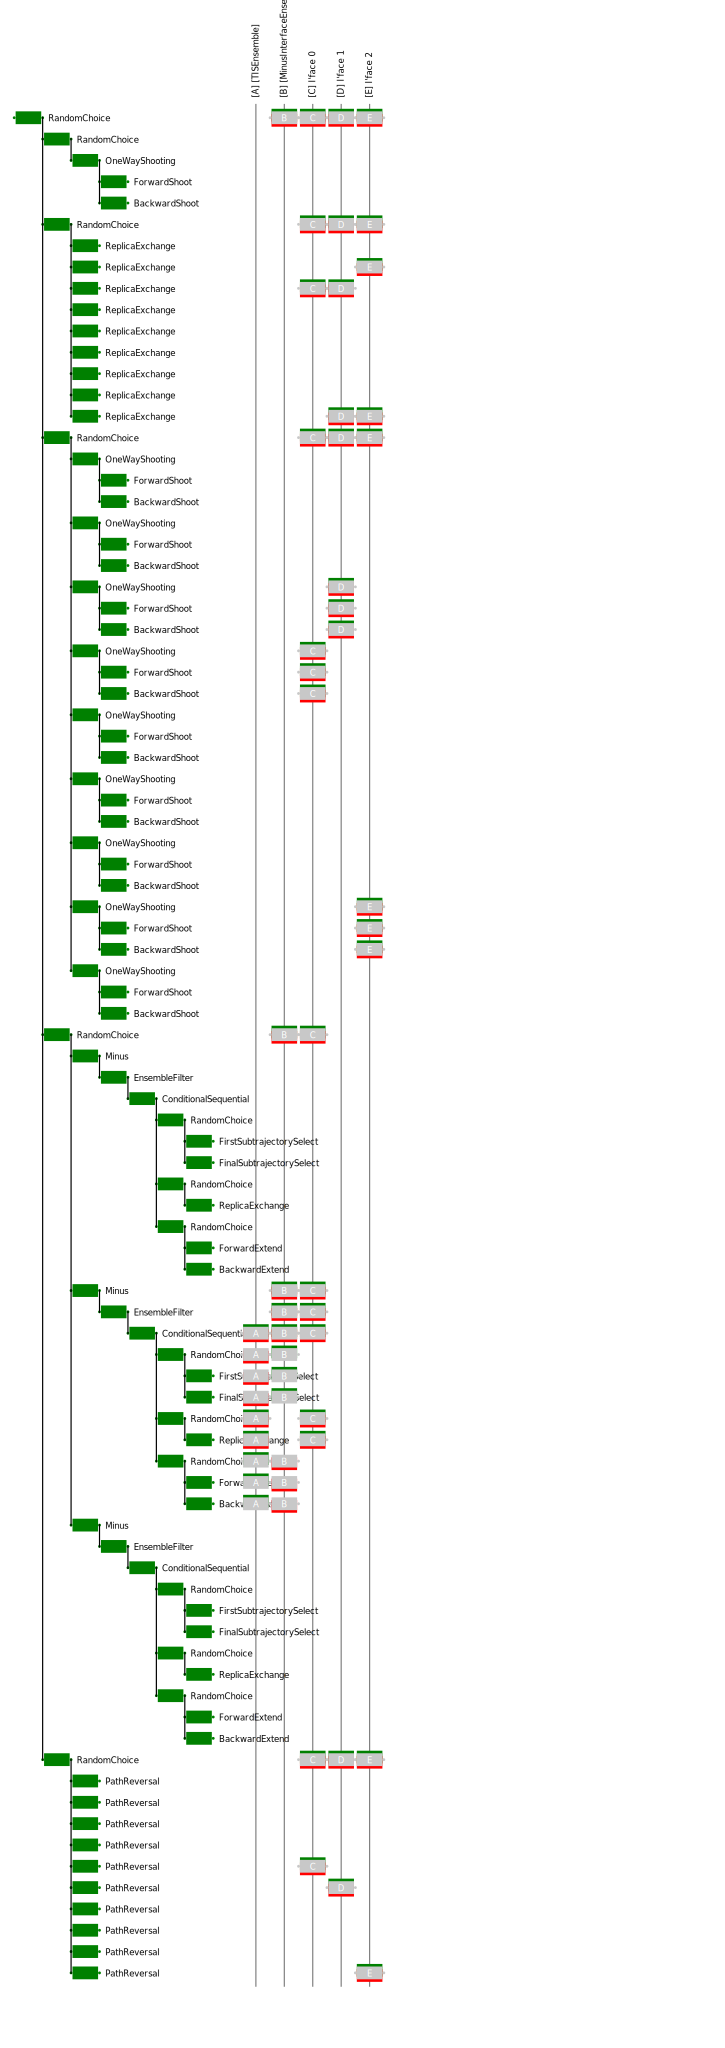

In [11]:
movevis.mover(scheme.root_mover, all_ensembles)
view = movevis.renderer
view.zoom = 1.5
view.scale_y = 18
view.scale_th = 20
view.font_size = 0.4
SVG(view.to_svg())

This is experimental D3 support. 

In [12]:
vis = paths.visualize.MoveTreeNX(scheme.root_mover)

In [13]:
HTML(vis.d3vis())

Goal should be to have a dynamic view on what is happening, like an automatically updated movetree or showing which mover is currently used. Using the capabilities of D3 this should be quite easy.